Credit Card Fraud Detection 

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix , accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns

df = pd.read_csv("creditcard.csv" )

In [104]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [106]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [107]:
# Missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [108]:
df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

Data Visualisation

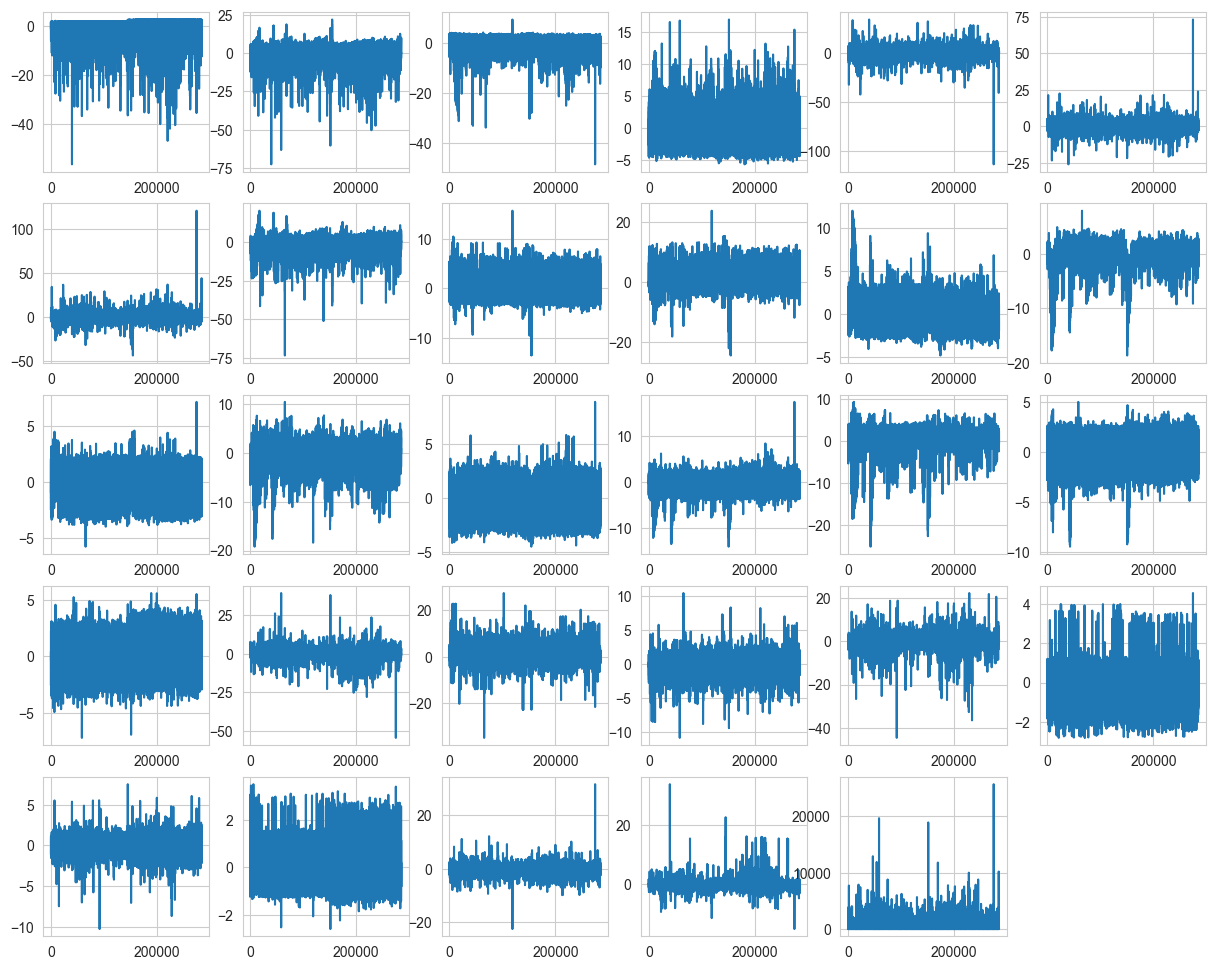

In [109]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

In [110]:
correlation_with_class = df.corr(method='pearson')['Class'].abs()
strong_correlation_features = correlation_with_class[correlation_with_class > 0.2]
print(strong_correlation_features)

V10      0.216883
V12      0.260593
V14      0.302544
V17      0.326481
Class    1.000000
Name: Class, dtype: float64


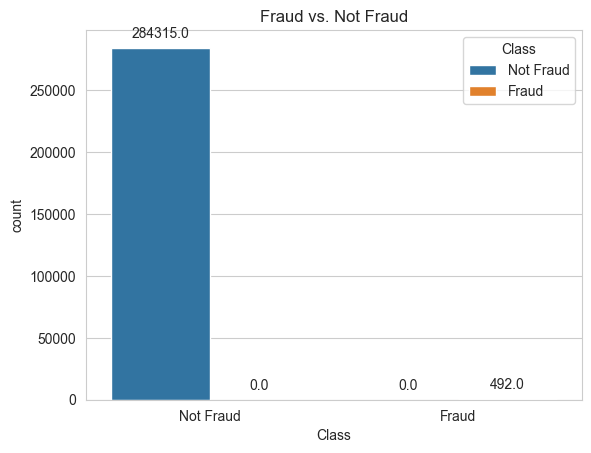

In [111]:
Class_decoded = df['Class'].replace({0: 'Not Fraud', 1: 'Fraud'})
ax = sns.countplot(x = Class_decoded,hue = Class_decoded , data = df)
ax.set_title('fraud vs. not fraud ')
# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set the plot title
plt.title('Fraud vs. Not Fraud')
# Show the plot
plt.show()

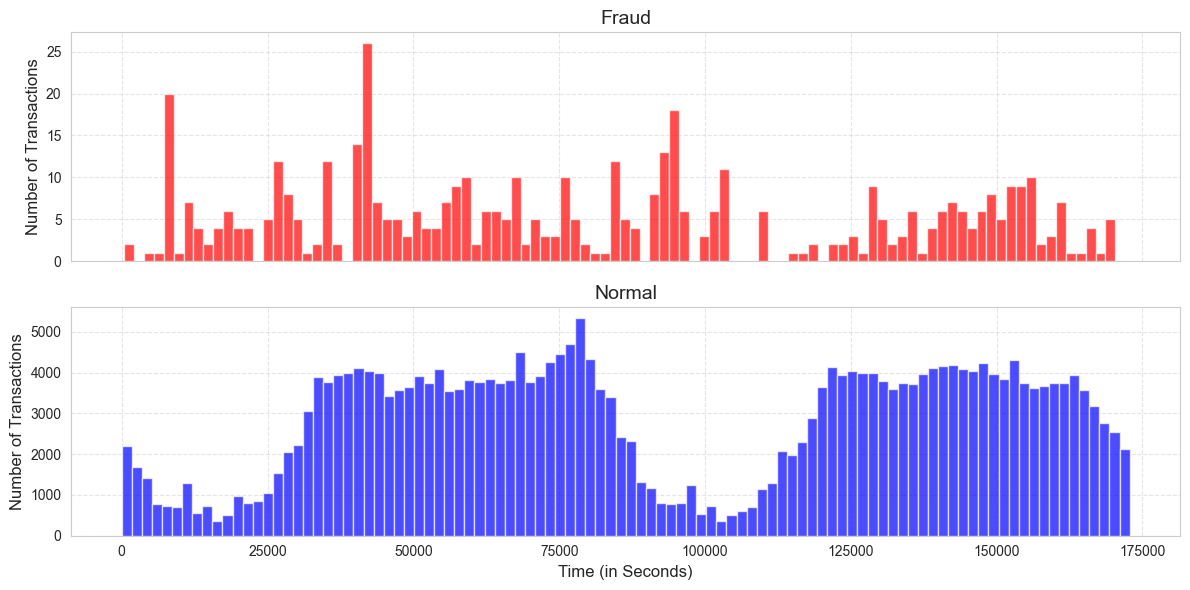

In [112]:
# Distribution of credit card transactions over time
sns.set_style("whitegrid")
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

# fraud card 
ax1.hist(df['Time'][df['Class'] == 1] , bins = 100 ,  color='red', alpha=0.7)
ax1.set_title('Fraud', fontsize=14)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Not fraud card 
ax2.hist(df['Time'][df['Class'] == 0] , bins = 100 ,  color='blue', alpha=0.7)
ax2.set_title('Normal', fontsize=14)
ax2.set_xlabel('Time (in Seconds)', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


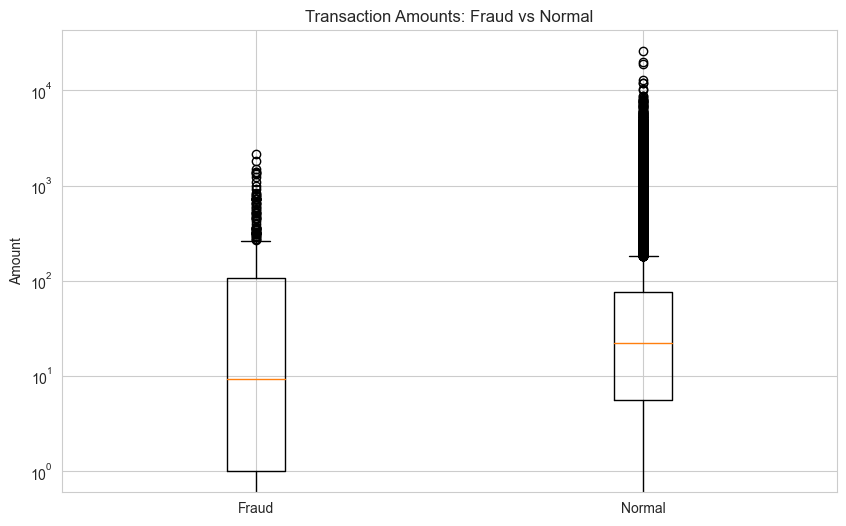

In [113]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df["Class"]==1]["Amount"], df[df["Class"]==0]["Amount"]], 
            labels=['Fraud', 'Normal'])

plt.title('Transaction Amounts: Fraud vs Normal')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()

Data Preparation

In [114]:
y = df['Class']
df.drop('Class' , axis=1 , inplace=True)
X = df

In [115]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [116]:
# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Architecture

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  
from sklearn.ensemble import RandomForestClassifier  


model = RandomForestClassifier()  

# Define the cross-validation method 
kf = KFold(n_splits=3, shuffle=True)  
print(kf)
# Perform cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  

# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())


KFold(n_splits=3, random_state=None, shuffle=True)
Cross-Validation Results: [0.99954706 0.99956813 0.99955759]
Mean Accuracy: 0.9995575951433668


In [118]:
# Fit the model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9995084399111681


Metrics

In [119]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9192546583850931
Recall: 0.774869109947644
F1-Score: 0.8409090909090908


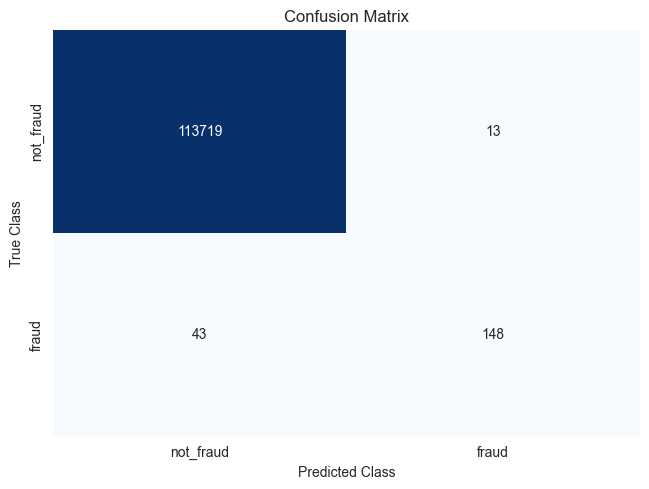

In [120]:
# Confusion Matrix
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

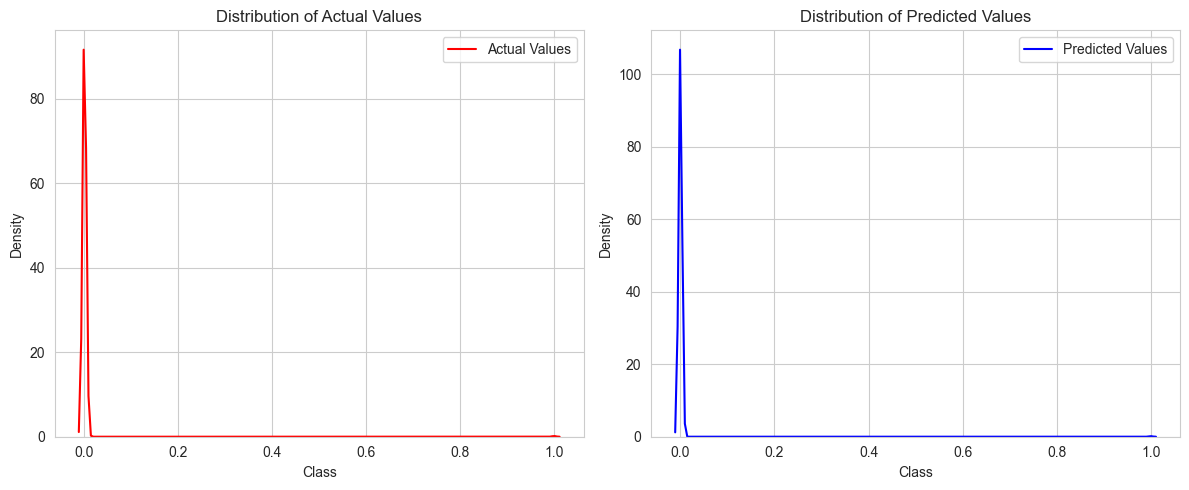

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the  distribution of Actual Values
sns.kdeplot(y_test, color='red', label='Actual Values', ax=ax1)
ax1.set_title('Distribution of Actual Values')
ax1.set_xlabel('Class')
ax1.set_ylabel('Density')

# Plot the distribution of Predicted Values
sns.kdeplot(y_pred, color='blue', label='Predicted Values', ax=ax2)
ax2.set_title('Distribution of Predicted Values')
ax2.set_xlabel('Class')
ax2.set_ylabel('Density')

ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

Oversampling 

In [122]:
# increase the representation of the minority class (fraudulent transactions)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [123]:
y_resampled.value_counts()

Class
0    170583
1    170583
Name: count, dtype: int64

In [124]:
# Fit the model on the entire training set
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9995347734873555


In [125]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Alternatively, you can calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8631578947368421
Recall: 0.8586387434554974
F1-Score: 0.8608923884514436


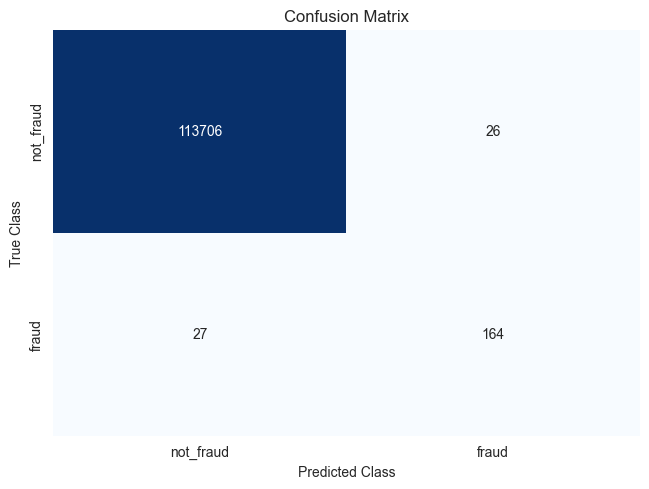

In [126]:
# Confusion Matrix
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()